# Linear ODE System Solution using Cayley-Hamilton Theorem

This notebook solves the following system of Ordinary Differential Equations (ODEs):
$$
\begin{cases}
\dot{x} = x + 2y \\
\dot{y} = -x + 4y
\end{cases}
$$

with initial condition $\mathbf{x}_0 = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$.

The system can be written as $\dot{\mathbf{x}} = A\mathbf{x}$ where $A = \begin{pmatrix} 1 & 2 \\ -1 & 4 \end{pmatrix}$.

We will use the **Cayley-Hamilton theorem** to compute the matrix exponential $e^{At}$ and find the exact solution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Enable pretty printing for SymPy
sp.init_printing(use_latex="mathjax")

## 1. Define Matrix A and Initial Conditions

In [3]:
# Define Matrix A and initial vector x0
A = sp.Matrix([[1, 2], [-1, 4]])
x0 = sp.Matrix([2, 1])

print("Matrix A:")
display(A)
print("Initial Condition x0:")
display(x0)

Matrix A:


⎡1   2⎤
⎢     ⎥
⎣-1  4⎦

Initial Condition x0:


⎡2⎤
⎢ ⎥
⎣1⎦

## 2. Characteristic Polynomial and Eigenvalues

The characteristic polynomial is $p(\lambda) = \det(A - \lambda I)$.
According to Cayley-Hamilton, $p(A) = 0$.

We need the eigenvalues to rewrite $e^{At}$.

In [4]:
lam = sp.symbols("lambda")
I = sp.eye(2)

# Characteristic Polynomial
char_poly = (A - lam * I).det()
print("Characteristic Polynomial p(lambda):")
display(char_poly)

# Find Eigenvalues
eigenvals = sp.solve(char_poly, lam)
print("\nEigenvalues:")
display(eigenvals)

lambda1, lambda2 = eigenvals[0], eigenvals[1]

Characteristic Polynomial p(lambda):


 2          
λ  - 5⋅λ + 6


Eigenvalues:


[2, 3]

## 3. Compute Matrix Exponential $e^{At}$

Using the property that any function of a matrix $2 \times 2$ can be written as a linear polynomial of the matrix:
$$ e^{At} = \alpha_0(t) I + \alpha_1(t) A $$

To find $\alpha_0(t)$ and $\alpha_1(t)$, we solving the corresponding scalar equations for the eigenvalues:
$$
\begin{cases}
e^{\lambda_1 t} = \alpha_0(t) + \alpha_1(t) \lambda_1 \\
e^{\lambda_2 t} = \alpha_0(t) + \alpha_1(t) \lambda_2
\end{cases}
$$

In [5]:
t = sp.symbols("t", real=True)
a0, a1 = sp.symbols("alpha_0 alpha_1", cls=sp.Function)
a0 = a0(t)
a1 = a1(t)

# Define the system of equations
eq1 = sp.Eq(sp.exp(lambda1 * t), a0 + a1 * lambda1)
eq2 = sp.Eq(sp.exp(lambda2 * t), a0 + a1 * lambda2)

# Solve for alpha0 and alpha1
sol_coeffs = sp.solve((eq1, eq2), (a0, a1))
alpha0 = sol_coeffs[a0]
alpha1 = sol_coeffs[a1]

print("Coefficient alpha_0(t):")
display(alpha0)
print("Coefficient alpha_1(t):")
display(alpha1)

Coefficient alpha_0(t):


     3⋅t      2⋅t
- 2⋅ℯ    + 3⋅ℯ   

Coefficient alpha_1(t):


 3⋅t    2⋅t
ℯ    - ℯ   

Now construct the Matrix Exponential:
$$ e^{At} = \alpha_0(t) I + \alpha_1(t) A $$

In [6]:
# Construct Matrix Exponential
exp_At = sp.simplify(alpha0 * I + alpha1 * A)

print("Matrix Exponential e^(At):")
display(exp_At)

Matrix Exponential e^(At):


⎡⎛     t⎞  2⋅t    ⎛ t    ⎞  2⋅t⎤
⎢⎝2 - ℯ ⎠⋅ℯ     2⋅⎝ℯ  - 1⎠⋅ℯ   ⎥
⎢                              ⎥
⎢⎛     t⎞  2⋅t  ⎛   t    ⎞  2⋅t⎥
⎣⎝1 - ℯ ⎠⋅ℯ     ⎝2⋅ℯ  - 1⎠⋅ℯ   ⎦

## 4. Final Solution

The general solution is $\mathbf{x}(t) = e^{At} \mathbf{x}_0$.

In [7]:
# Calculate exact solution x(t)
x_t = sp.simplify(exp_At * x0)

print("Exact Solution x(t) for x0 = [2, 1]:")
display(x_t)

# Extract individual components
x_func = sp.lambdify(t, x_t[0], "numpy")
y_func = sp.lambdify(t, x_t[1], "numpy")

Exact Solution x(t) for x0 = [2, 1]:


⎡   2⋅t⎤
⎢2⋅ℯ   ⎥
⎢      ⎥
⎢  2⋅t ⎥
⎣ ℯ    ⎦

## 5. Phase Portrait

We will envision the vector field $\dot{\mathbf{x}} = A \mathbf{x}$ and the trajectory we just calculated.

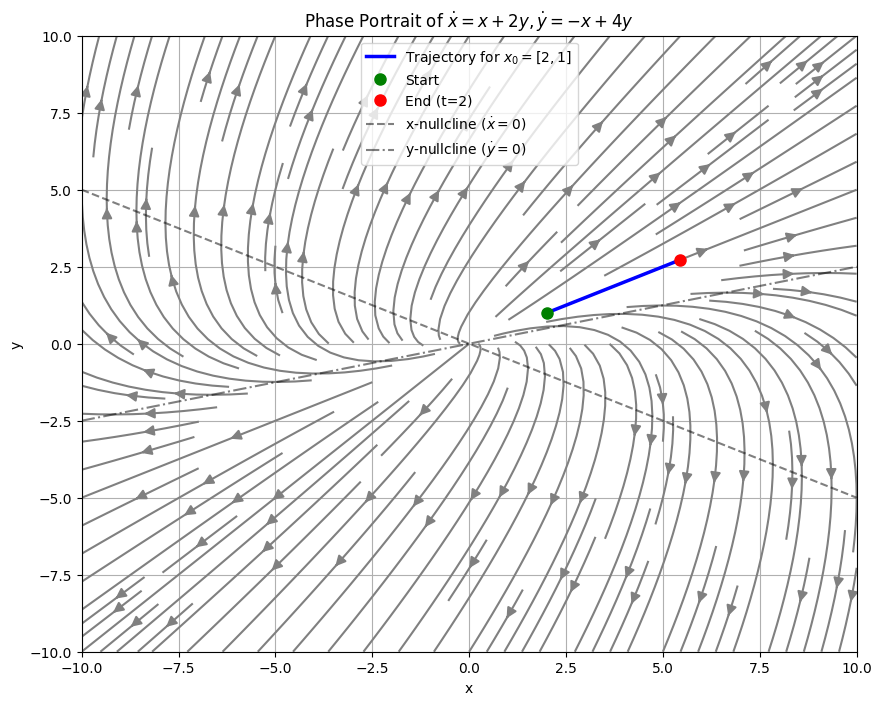

In [13]:
# Numerical parameters for plotting
range_lim = 10
x_vals = np.linspace(-range_lim, range_lim, 20)
y_vals = np.linspace(-range_lim, range_lim, 20)

X, Y = np.meshgrid(x_vals, y_vals)

# Define derivatives for vector field
# dx = x + 2y
# dy = -x + 4y
DX = X + 2 * Y
DY = -X + 4 * Y

# Calculate the trajectory using our analytical solution
t_vals = np.linspace(0, 0.5, 100)
x_traj = x_func(t_vals)
y_traj = y_func(t_vals)

# Initialize Figure
plt.figure(figsize=(10, 8))

# Streamplot for vector field
# Removed 'alpha' argument as it is not supported in streamplot
plt.streamplot(X, Y, DX, DY, density=1.5, color="gray", arrowsize=1.5)

# Plot the specific solution trajectory
plt.plot(x_traj, y_traj, "b-", linewidth=2.5, label="Trajectory for $x_0=[2,1]$")
plt.plot(x_traj[0], y_traj[0], "go", markersize=8, label="Start")
plt.plot(x_traj[-1], y_traj[-1], "ro", markersize=8, label="End (t=2)")

# Plot Nullclines
# x-nullcline: x + 2y = 0 => y = -0.5x
plt.plot(x_vals, -0.5 * x_vals, "k--", label=r"x-nullcline ($\dot{x}=0$)", alpha=0.5)

# y-nullcline: -x + 4y = 0 => y = 0.25x
plt.plot(x_vals, 0.25 * x_vals, "k-.", label=r"y-nullcline ($\dot{y}=0$)", alpha=0.5)


plt.title(r"Phase Portrait of $\dot{x} = x+2y, \dot{y} = -x+4y$")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-range_lim, range_lim)
plt.ylim(-range_lim, range_lim)
plt.legend()
plt.grid(True)
plt.show()